In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.stats import linregress as linregress
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [3]:
data = np.genfromtxt("data/autoCorrTest8/autoCorr_5000.csv", delimiter=',')
for i in range(5100, 35000, 100):
    data = data + np.genfromtxt("data/autoCorrTest8/autoCorr_{}.csv".format(i), delimiter=',')

In [4]:
data2 = data / 300

### Vertical Auto-correlation function in ML bulk (interface + 244)

Text(0, 0.5, '$\\langle C(r)\\rangle$')

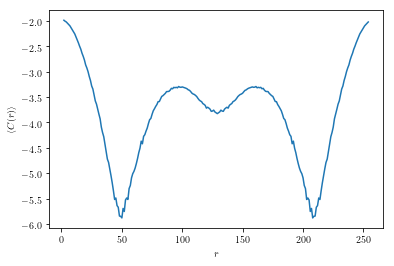

In [5]:
#data2 = data2/3
r2 = np.arange(data2.shape[1]) + 1
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(r2[1:], np.log(data2[288,1:] + 0.035))
ax1.set_xlabel(r'$r$')
ax1.set_ylabel(r'$\langle C(r)\rangle$')
#ax1.set_ylim(bottom=-0.05, top=0.125)

In [6]:
x1 = np.arange(0, 40)
x1.shape
np.log(data2[288,10:50] + 0.035).shape
line1 = linregress(x1, np.log(data2[288,10:50] + 0.035))
1/line1.slope

-9.962339543289582

Text(0, 0.5, '$\\langle C(r)\\rangle$')

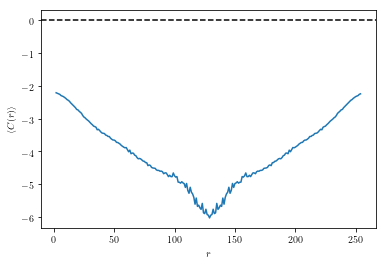

In [7]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(r2[1:], np.log(data2[128,1:] + 0.03))
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel(r'$r$')
ax2.set_ylabel(r'$\langle C(r)\rangle$')
#ax2.set_ylim(bottom=-0.05, top=0.1)

In [8]:
x2 = np.arange(0, 75)
x2.shape
np.log(data2[96,10:50] + 0.035).shape
line2 = linregress(x2, np.log(data2[96,25:100] + 0.035))
1/line2.slope

-24.119849155524037

### Vertical auto-correlation functions in different regions

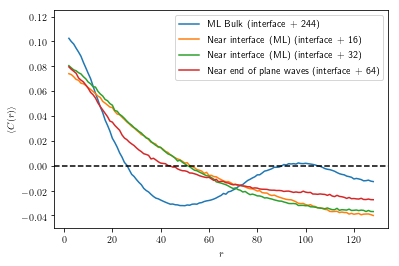

In [9]:
fig6, ax6 = plt.subplots(facecolor="white")
ax6.plot(r2[1:128], data2[288,1:128], label="ML Bulk (interface + 244)")
ax6.plot(r2[1:128], data2[80,1:128], label="Near interface (ML) (interface + 16)")
ax6.plot(r2[1:128], data2[96,1:128], label="Near interface (ML) (interface + 32)")
ax6.plot(r2[1:128], data2[128,1:128], label="Near end of plane waves (interface + 64)")
ax6.axhline(0, linestyle='--', color='k')
ax6.set_xlabel(r'$r$')
ax6.set_ylabel(r'$\langle C(r)\rangle$')
ax6.set_ylim(bottom=-0.05, top=0.125)
ax6.legend()

In [11]:
data3 = np.genfromtxt("data/autoCorrTest10/size_0/autoCorr_10000.csv", delimiter=',')
for i in range(10100, 20000, 100):
    data3 = data3 + np.genfromtxt("data/autoCorrTest10/size_0/autoCorr_{}.csv".format(i), delimiter=',')

In [12]:
data3 = data3/100

In [13]:
data4 = np.genfromtxt("data/autoCorrTest10/size_1/autoCorr_10000.csv", delimiter=',')
data5 = np.genfromtxt("data/autoCorrTest10/size_2/autoCorr_10000.csv", delimiter=',')
data6 = np.genfromtxt("data/autoCorrTest10/size_3/autoCorr_10000.csv", delimiter=',')
for i in range(10100, 20000, 100):
    data4 = data4 + np.genfromtxt("data/autoCorrTest10/size_1/autoCorr_{}.csv".format(i), delimiter=',')
    data5 = data5 + np.genfromtxt("data/autoCorrTest10/size_2/autoCorr_{}.csv".format(i), delimiter=',')
    data6 = data6 + np.genfromtxt("data/autoCorrTest10/size_3/autoCorr_{}.csv".format(i), delimiter=',')
data4 = data4/100
data5 = data5/100
data6 = data6/100

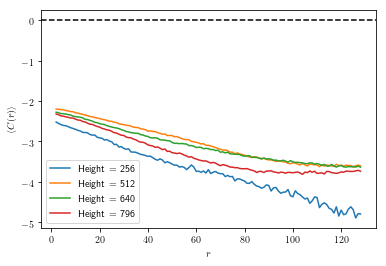

In [17]:
fig7, ax7 = plt.subplots(facecolor="white")
ax7.plot(r2[1:128], np.log(data3[80,1:128] + 0.03), label="Height = 256")
ax7.plot(r2[1:128], np.log(data4[80,1:128] + 0.03), label="Height = 512")
ax7.plot(r2[1:128], np.log(data5[80,1:128] + 0.03), label="Height = 640")
ax7.plot(r2[1:128], np.log(data6[80,1:128] + 0.03), label="Height = 796")
ax7.axhline(0, linestyle='--', color='k')
ax7.set_xlabel(r'$r$')
ax7.set_ylabel(r'$\langle C(r)\rangle$')
#ax7.set_ylim(bottom=-0.05, top=0.125)
ax7.legend()

In [18]:
line3 = linregress(x2, np.log(data3[80,0:75] + 0.03))
line4 = linregress(x2, np.log(data4[80,0:75] + 0.03))
line5 = linregress(x2, np.log(data5[80,0:75] + 0.03))
line6 = linregress(x2, np.log(data6[80,0:75] + 0.03))

In [19]:
syst_size = np.array([256, 512, 640, 796])
corr_len = 1/np.abs(np.array([line3.slope, line4.slope, line5.slope, line6.slope]))

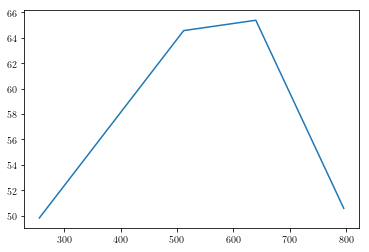

In [20]:
fig8, ax8 = plt.subplots(facecolor="white")
ax8.plot(syst_size, corr_len, label="Height = 256")